In [23]:
import numpy as np
from pandas import DataFrame 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

# Ex 2

# 1st dataset

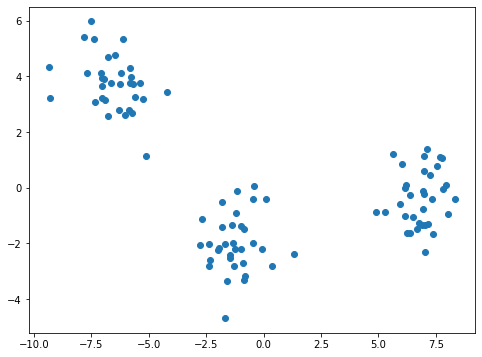

In [14]:
# Create simple data
X, y = datasets.make_blobs()
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show()

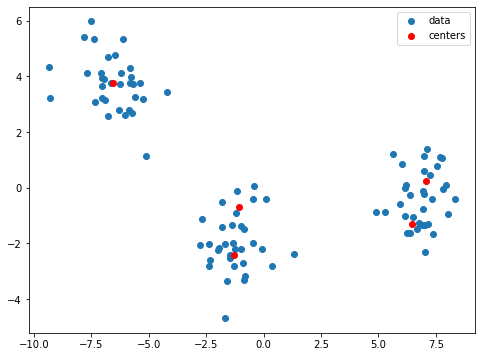

In [15]:
gm = GaussianMixture(n_components=5).fit(X)
centers = gm.means_
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show()

In [16]:
def gmm_change_cluster(X):
    f = plt.figure(figsize=(8, 6), dpi=80)
    f.add_subplot(2, 2, 1)

    for i in range(2, 6):
        gm = GaussianMixture(n_components=i).fit(X)
        pred = gm.predict(X)
        df = DataFrame({'x':X[:,0], 'y':X[:,1], 'label':pred})
        groups = df.groupby('label')
        f.add_subplot(2, 2, i-1)
        for name, group in groups:
            plt.scatter(group.x, group.y, label=name, s=8)
            plt.title("Cluster size:" + str(i))
            plt.legend()

    plt.tight_layout()        
    plt.show()  

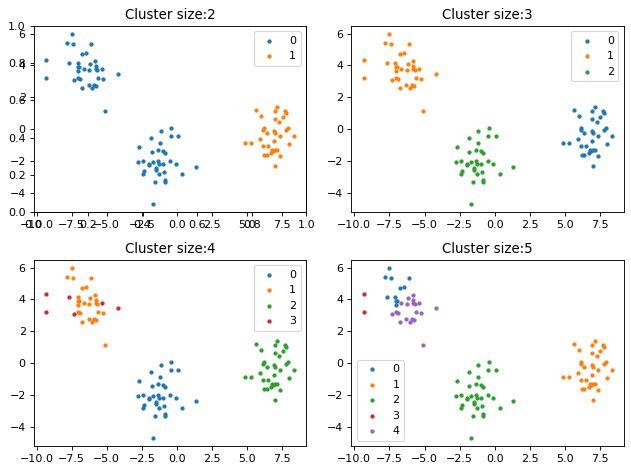

In [20]:
gmm_change_cluster(X)

In [21]:
def plot_elbow(X):
    meandist = []
    n_clusters = range(2,15)
    for n_cluster in n_clusters :
        gmm = GaussianMixture(n_components=n_cluster)
        gmm.fit(X)
        meandist.append(sum(np.min(cdist(X, gmm.means_, 'mahalanobis', VI=gmm.precisions_), axis=1)/X.shape[0]))
    plt.plot(n_clusters,meandist,'bx-')
    plt.xlabel('Number of Clusters') 
    plt.ylabel('Mean Mahalanobis Distance') 
    plt.title('GMM Clustering for n_cluster=2 to 15')
    plt.show()


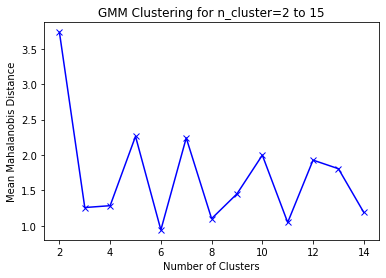

In [24]:
plot_elbow(X)

In [25]:
from sklearn import metrics
def silhouette_score(X):
    S=[]
    K=range(2,11)
    for k in K:
        model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
        labels = model.fit_predict(X)
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    plt.figure(figsize=(16,8), dpi=300)
    plt.plot(K, S, 'bo-', color='black')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Identify the number of clusters using Silhouette Score')
    plt.show()

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_62666/354992517.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


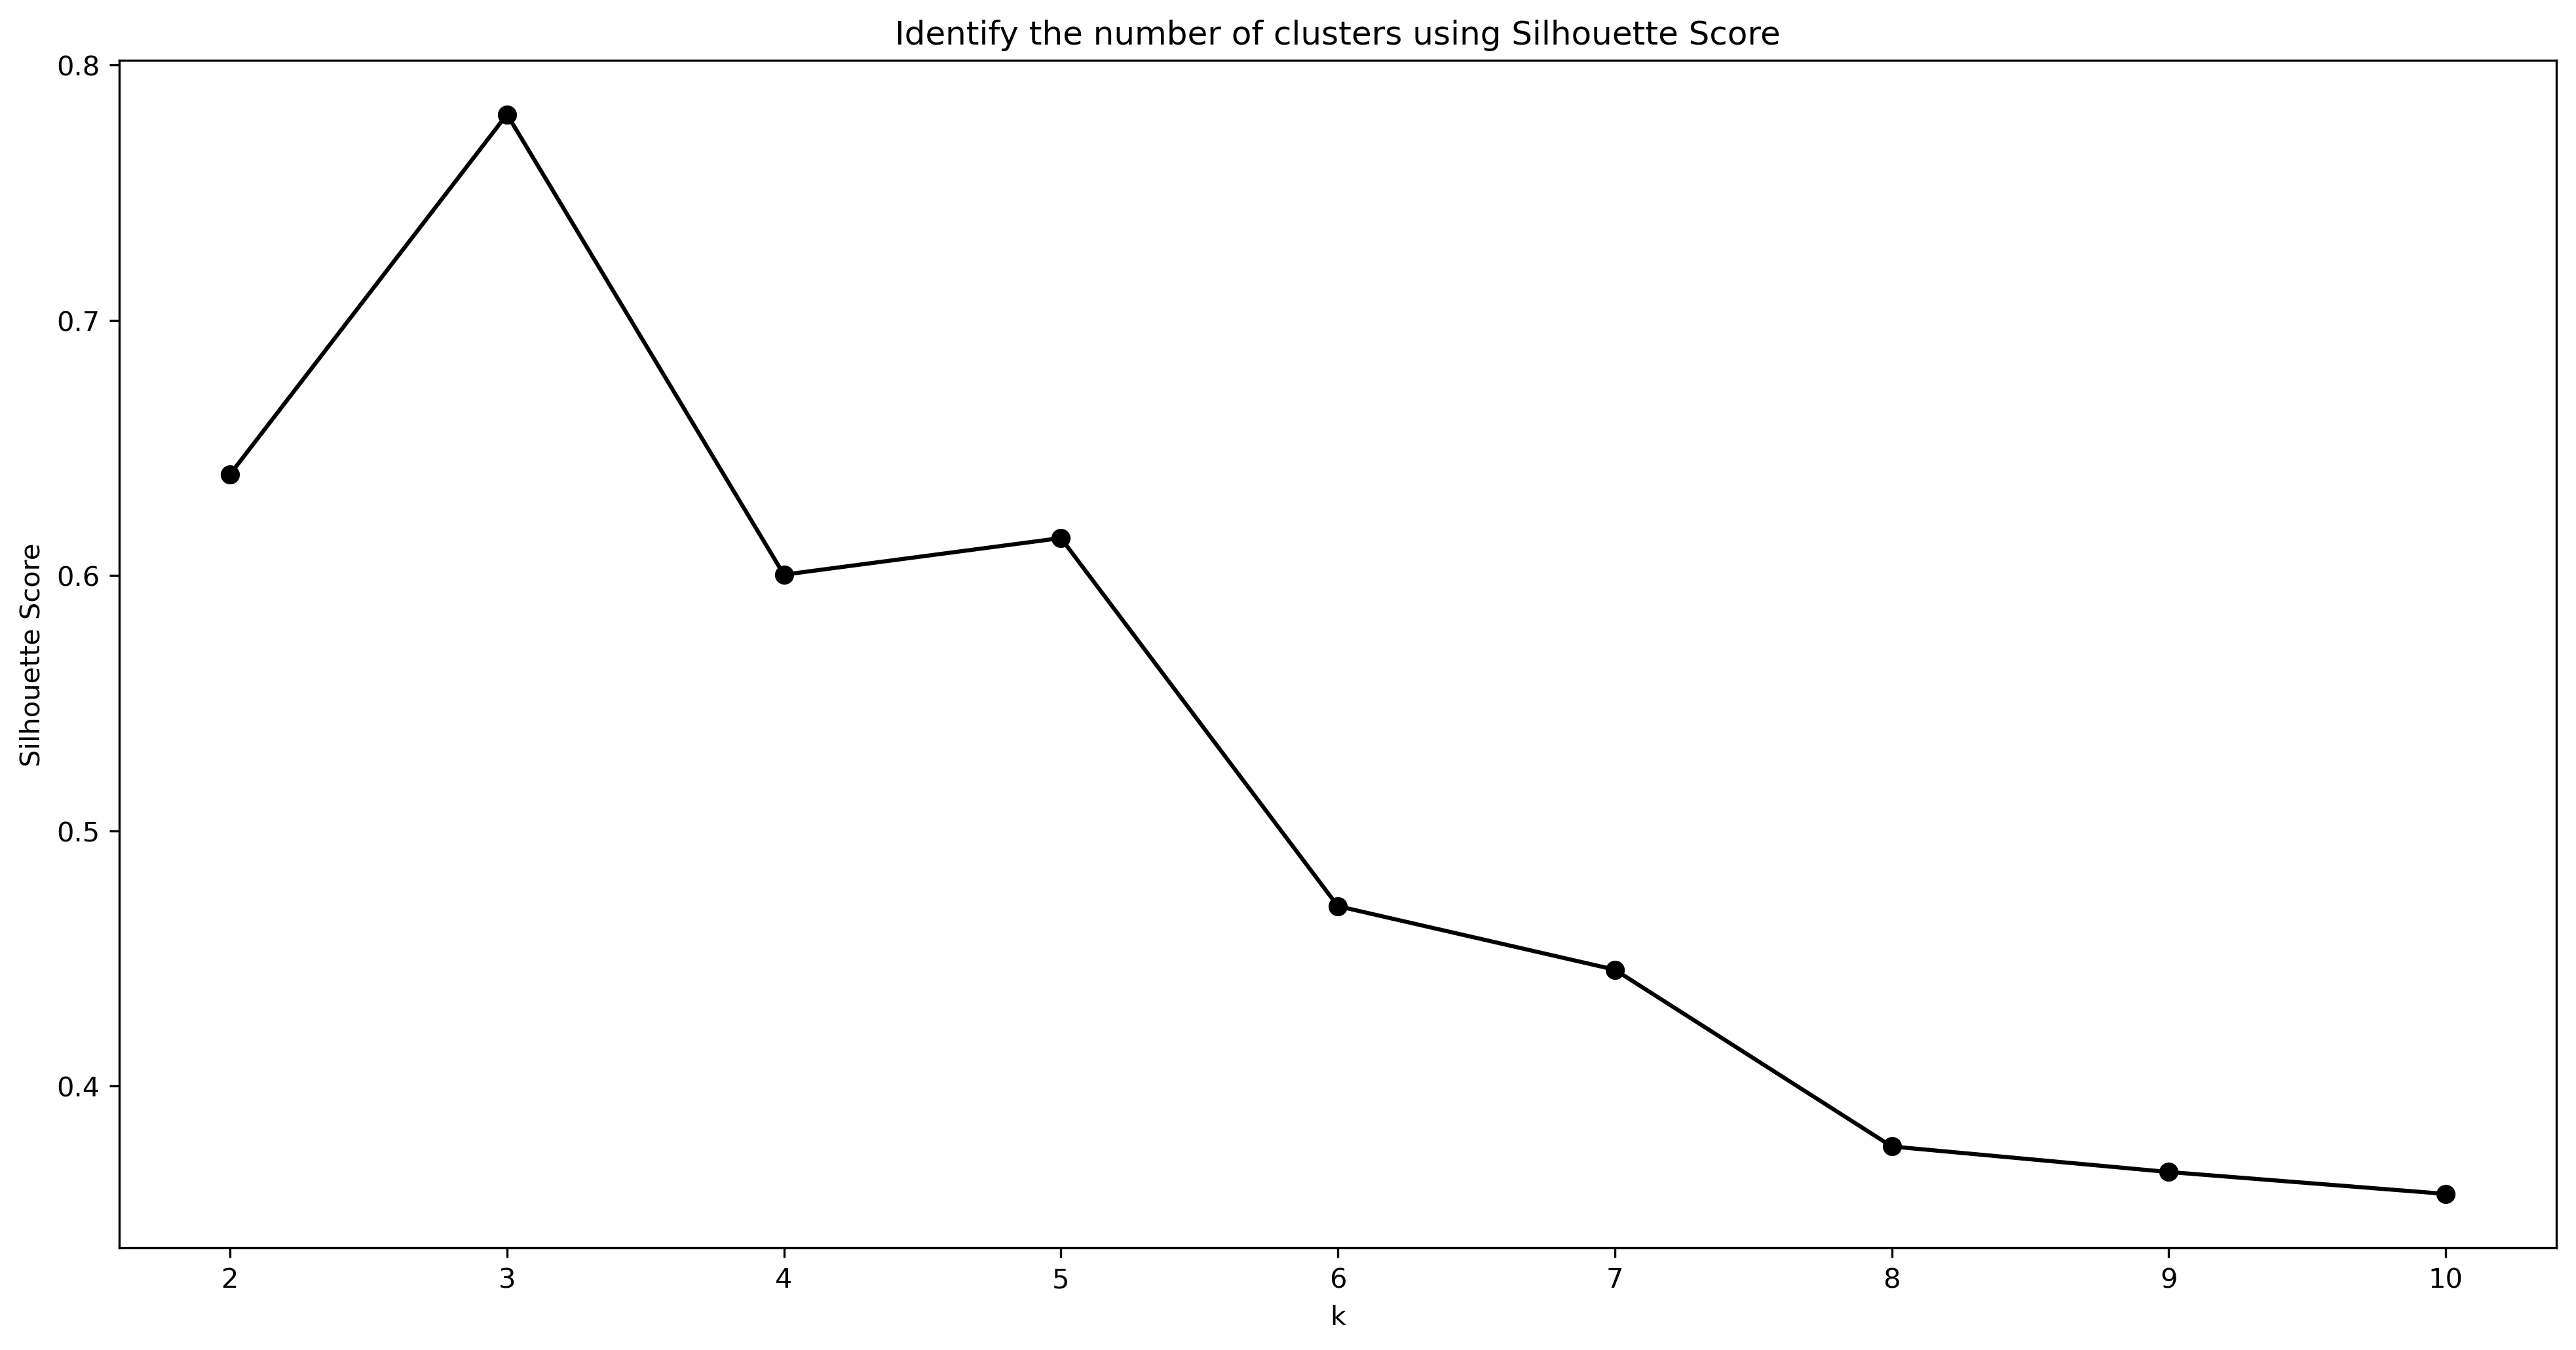

In [26]:
silhouette_score(X)

# 2nd dataset

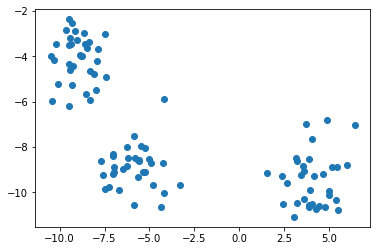

In [27]:

X_2, y = make_blobs(n_samples=100, centers=3, random_state=21)
plt.scatter(X_2[:, 0], X_2[:, 1])

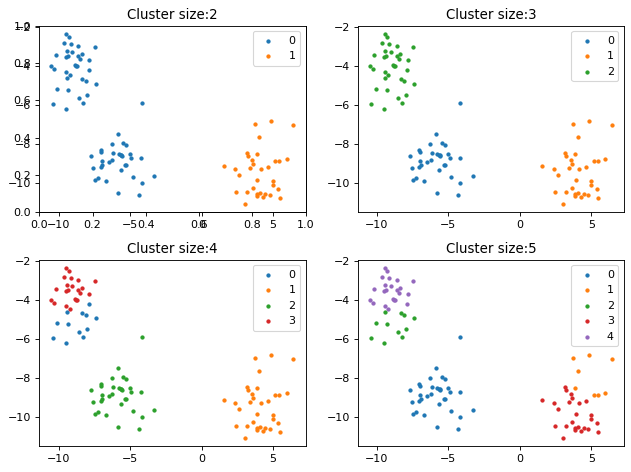

In [28]:
gmm_change_cluster(X_2)

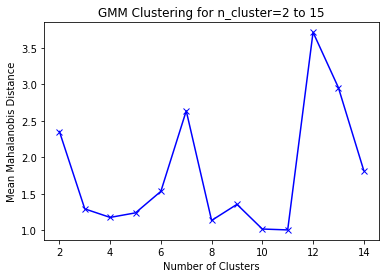

In [29]:
plot_elbow(X_2)

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_62666/354992517.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


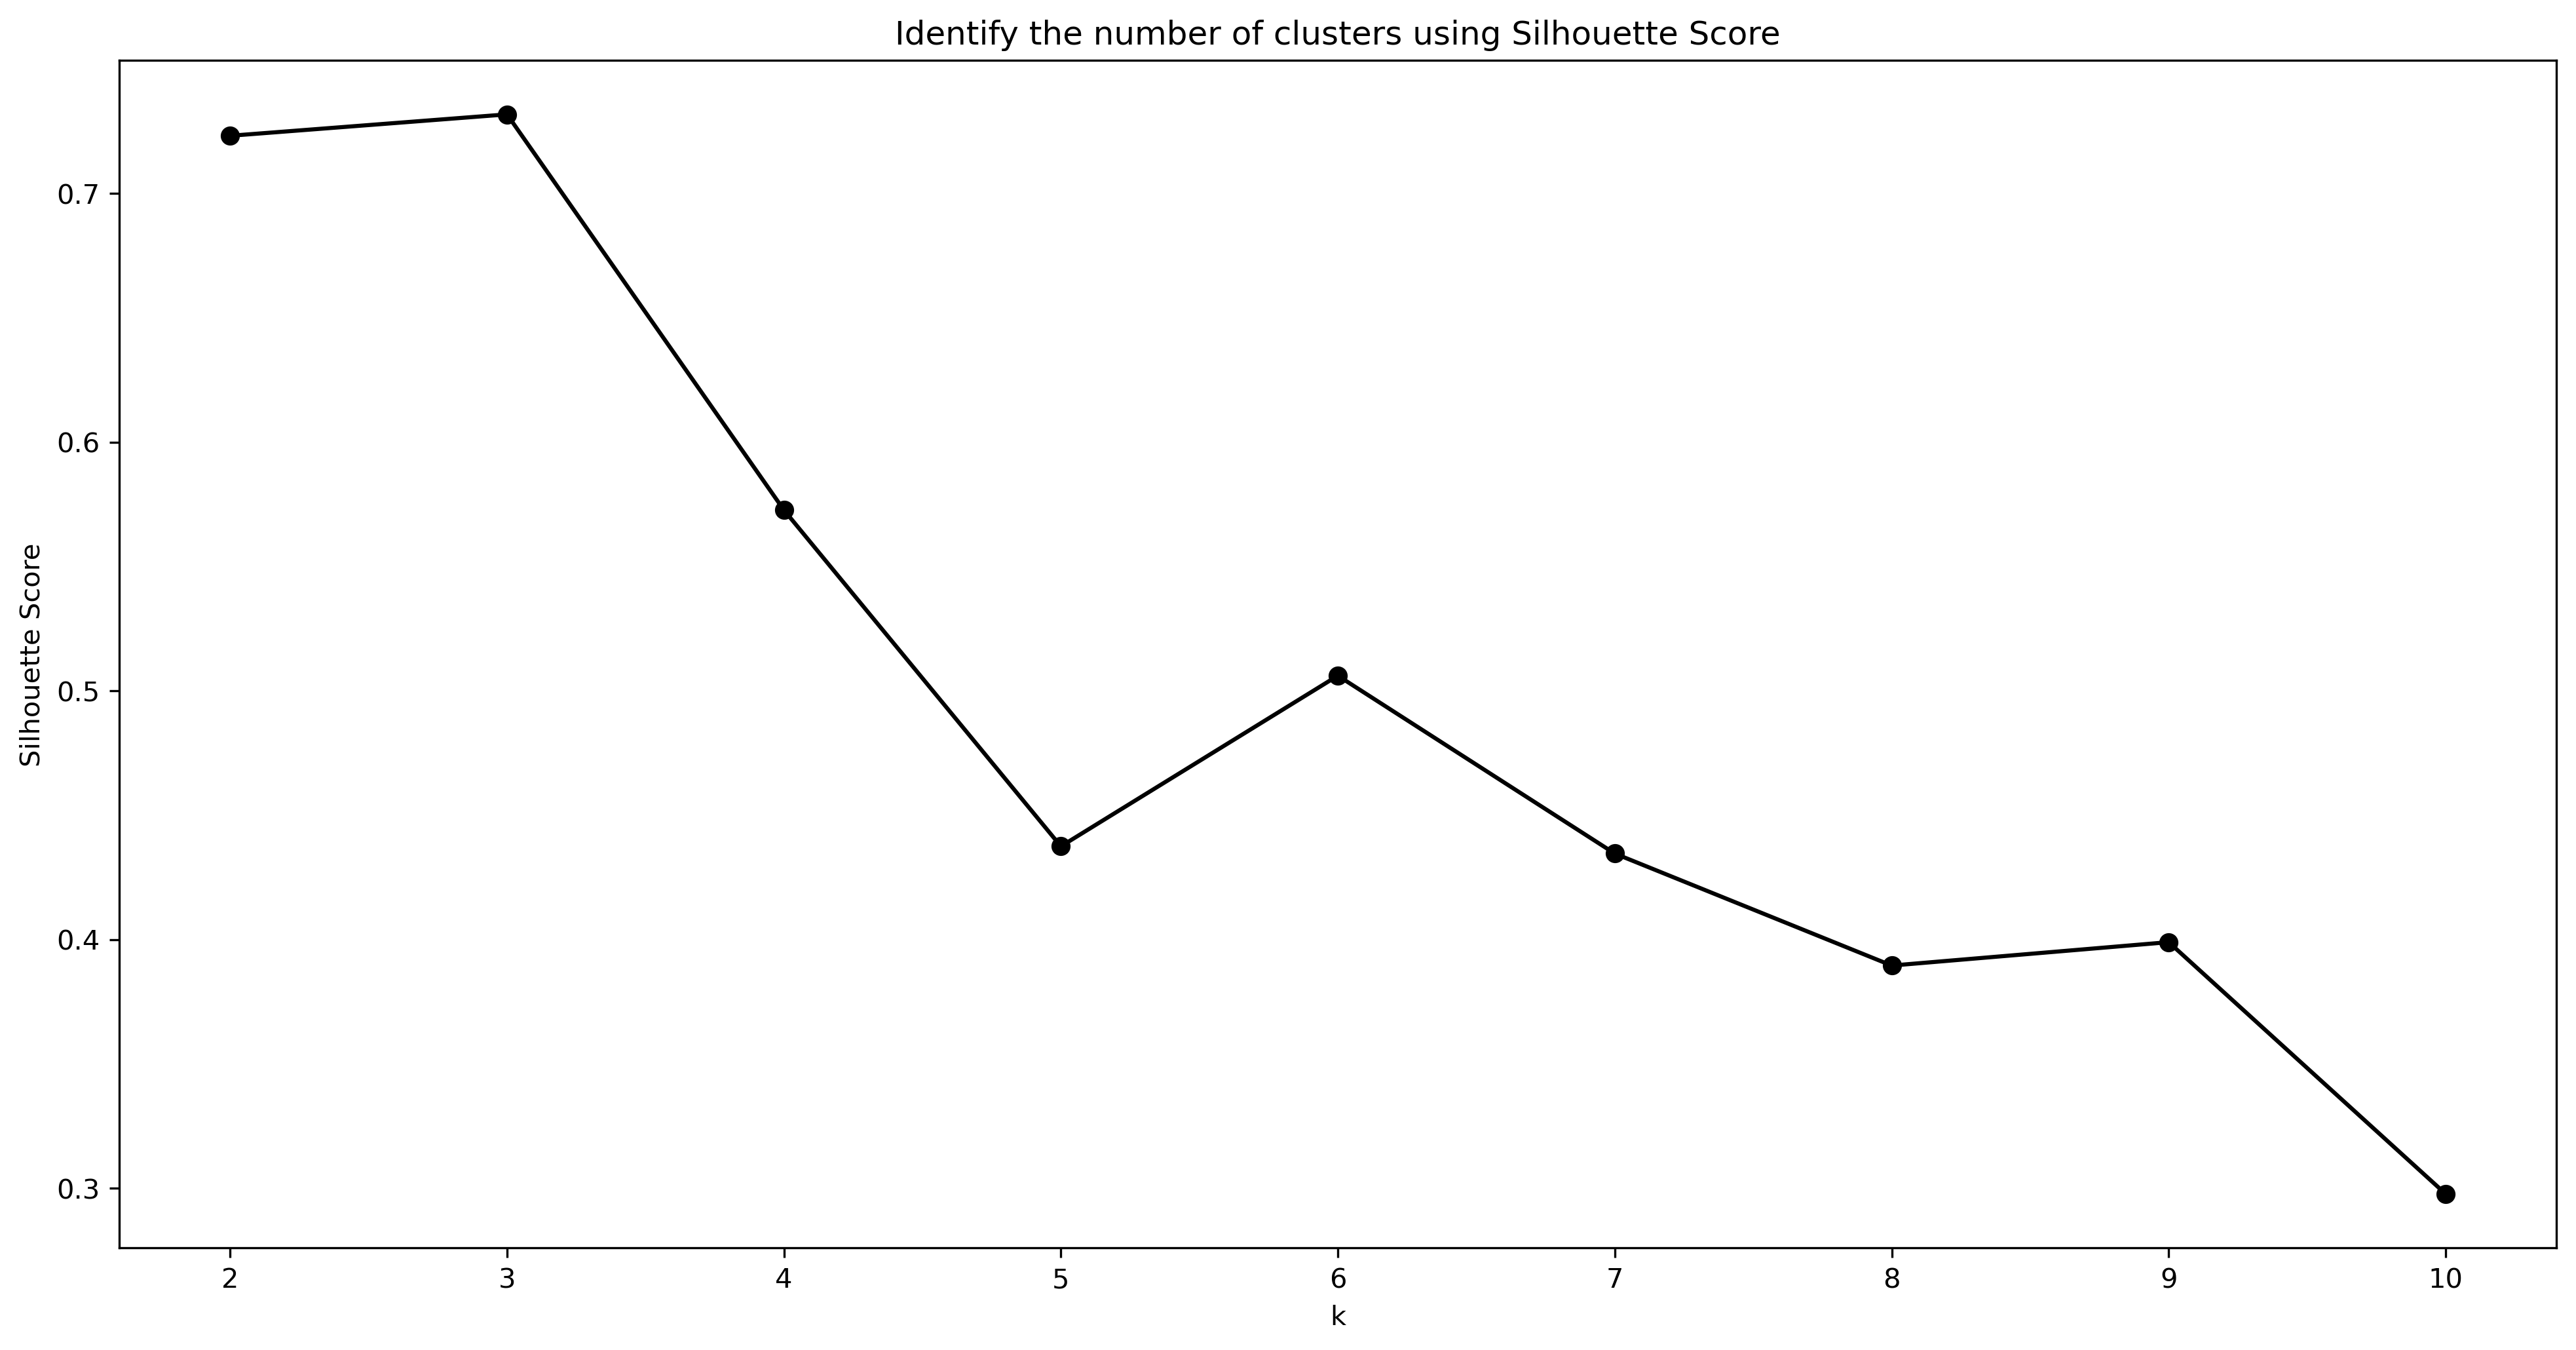

In [30]:
silhouette_score(X_2)

# 3rd dataset

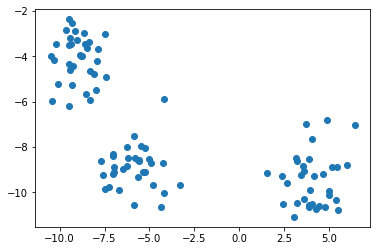

In [31]:

X_3, y = make_blobs(n_samples=100, centers=3, random_state=21)
plt.scatter(X_3[:, 0], X_3[:, 1]) 

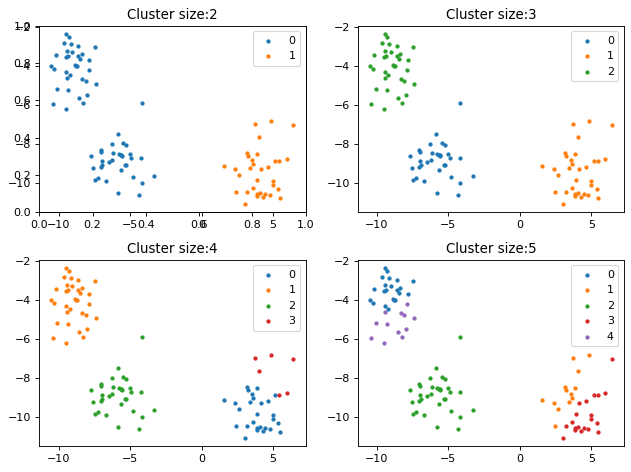

In [32]:
gmm_change_cluster(X_3)

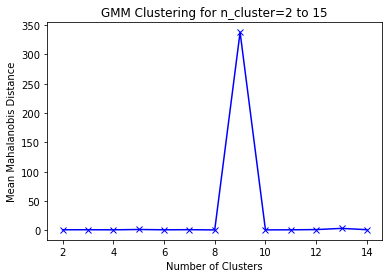

In [33]:
plot_elbow(X_3)

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_62666/354992517.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


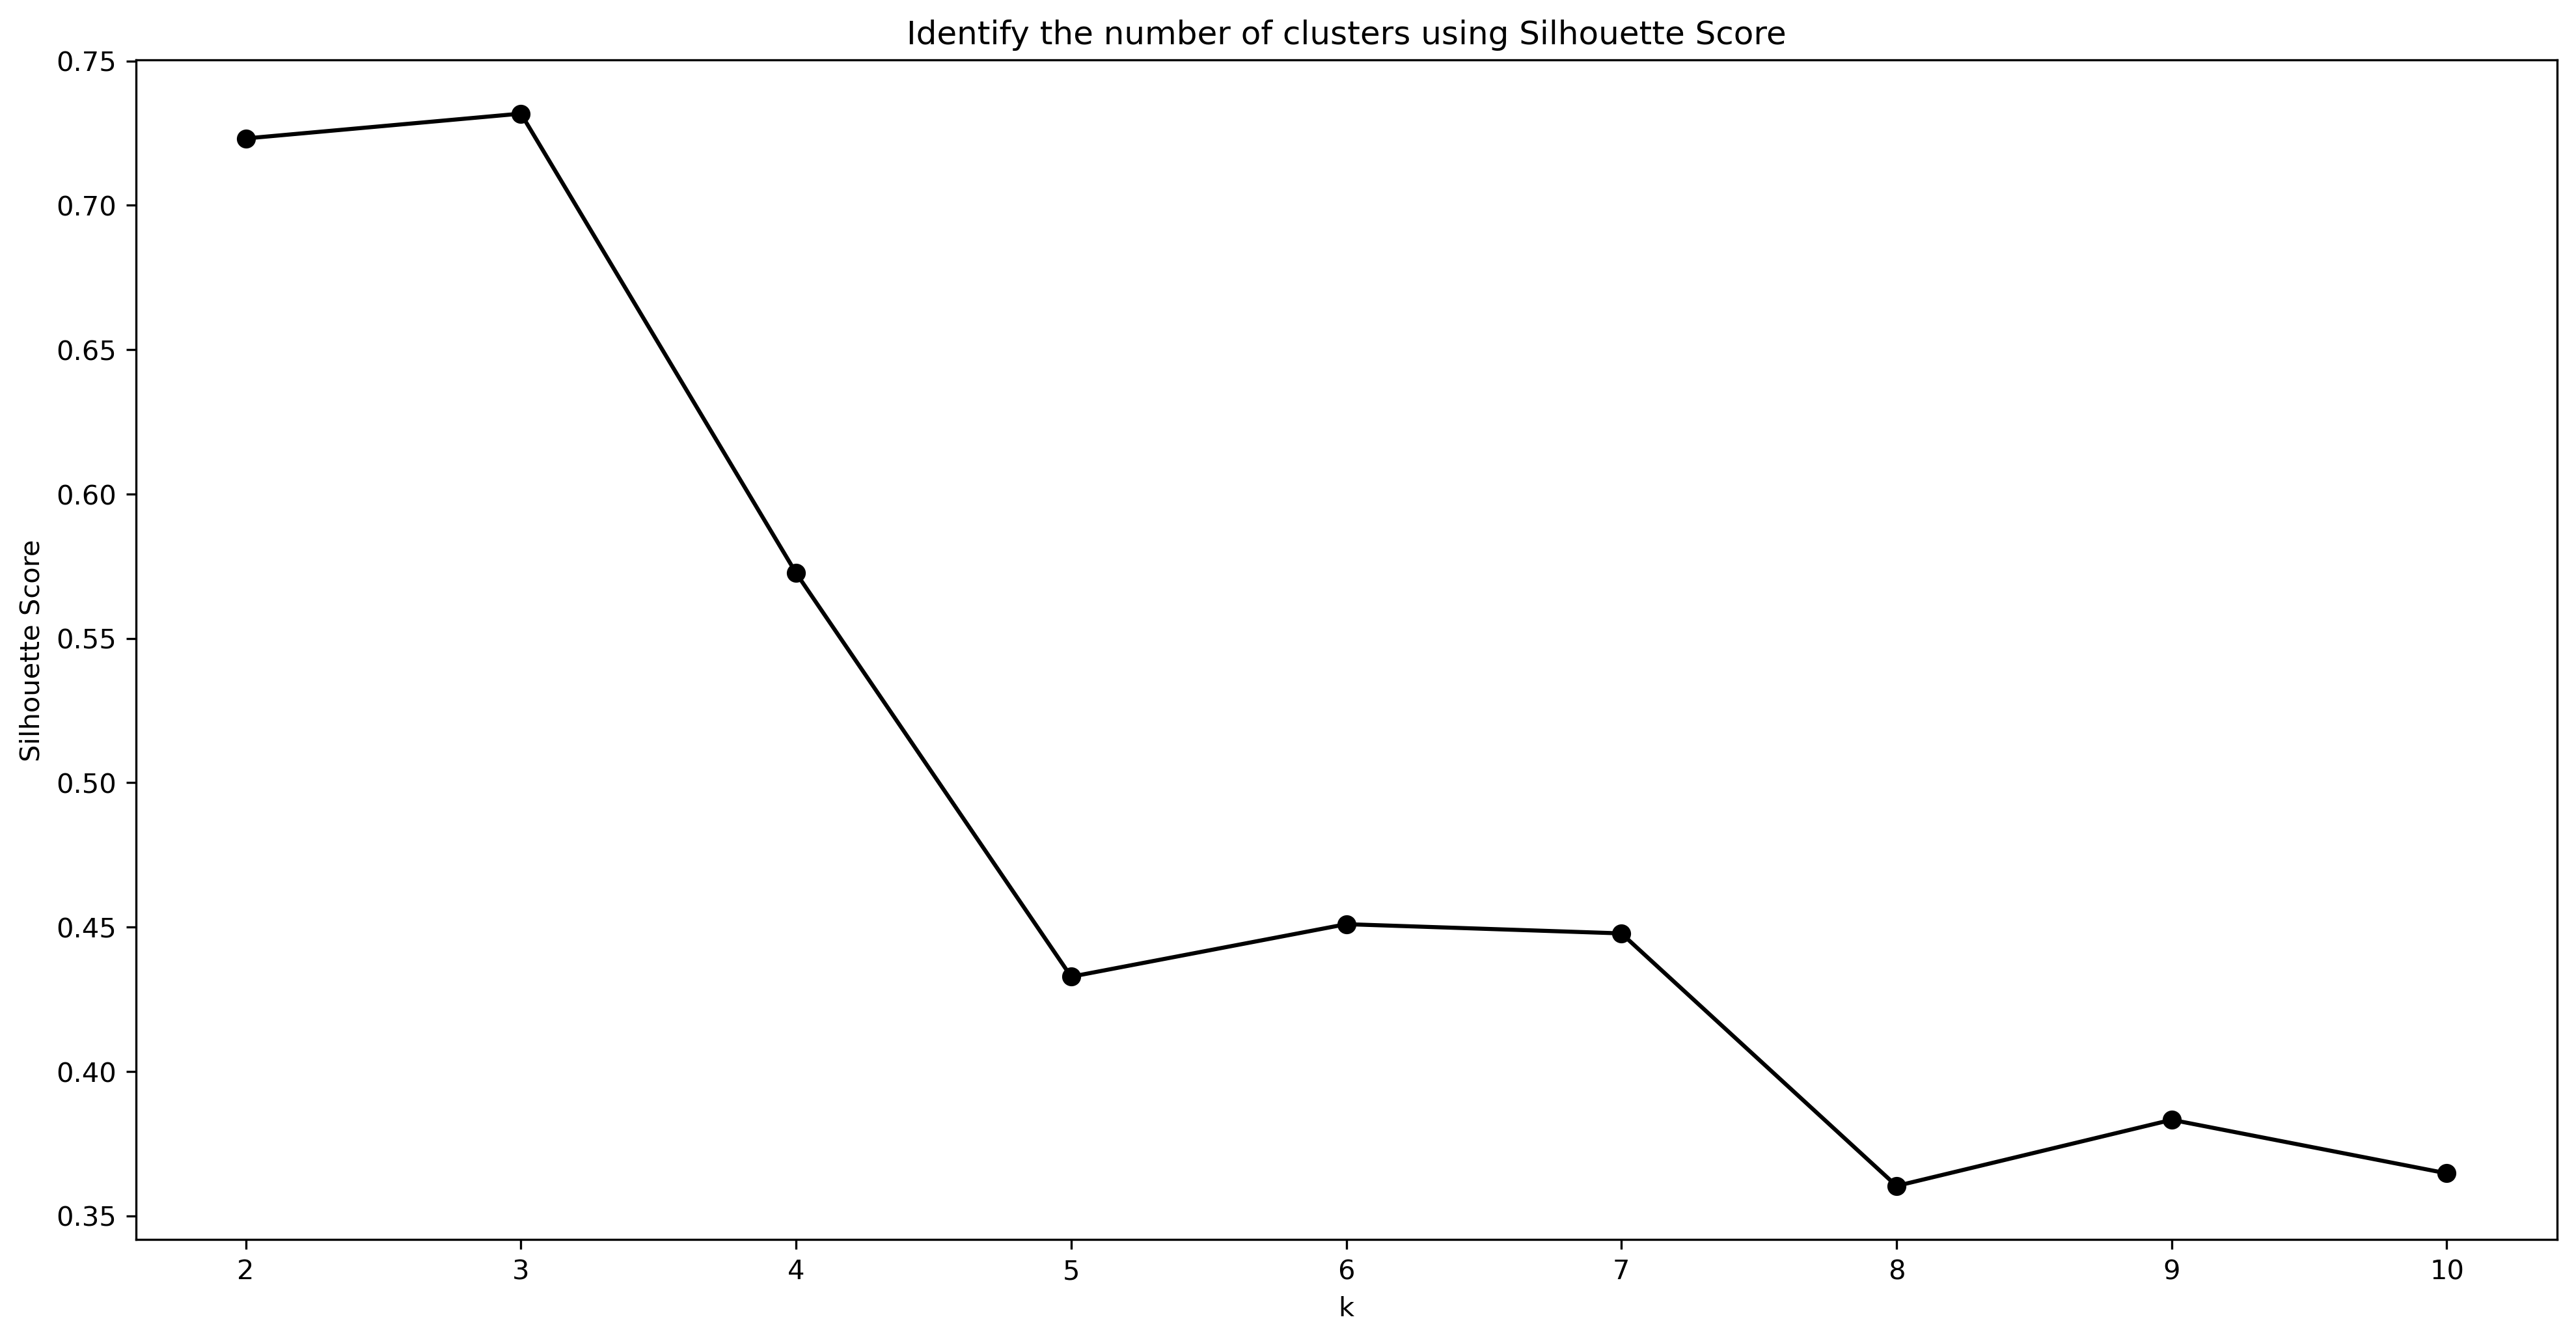

In [34]:
silhouette_score(X_3)

# EX 3

# GMM

Pros:

1.Flexibility: highly flexible and can fit complex data distributions. They can be used to model any continuous, multi-dimensional distribution, making them useful for a wide range of applications.

2.Soft clustering: allow for soft clustering, which means that they assign a probability to each data point belonging to each cluster, rather than assigning it to a single cluster. This makes them more flexible than hard clustering algorithms, which assign each data point to a single cluster.

3.Parameter estimation: use the Expectation-Maximization algorithm to estimate the model parameters, which can be done efficiently even for large datasets. This makes them useful for real-world applications where datasets are often large and complex.

Cons:

1.Initialization: can be sensitive to initialization. If the initial values for the mean and covariance of each cluster are chosen poorly, the algorithm may converge to a suboptimal solution.

2.Computationally expensive: can be computationally expensive, especially when the number of clusters is large or the dimensionality of the data is high. This can make them impractical for some applications.

3.Not suitable for all types of data: assume that the data is generated from a mixture of Gaussian distributions, which may not be appropriate for all types of data. If the data does not follow a Gaussian distribution, then a GMM may not provide a good fit.

# Kmean

Pros:

1.Simplicity: K-means is a simple and easy-to-implement algorithm, making it a popular choice for clustering tasks. 

2.Speed: K-means can be very fast, especially for large datasets, due to its linear time complexity.

3.Scalability: K-means can be scaled to handle very large datasets by using distributed computing frameworks like Apache Spark or Hadoop.

Cons:

1.K must be choose manually.

2.May converge to a local optimum.

# Ex 4

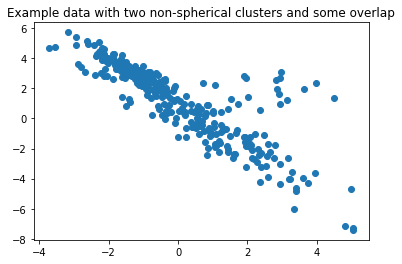

In [42]:
# Generate example data with two non-spherical clusters and some overlap
X, y = make_blobs(n_samples=300, centers=2, cluster_std=[1.0, 2.5], random_state=0)
X = np.dot(X, [[0.6, -0.6], [-0.4, 0.8]])
X = np.concatenate((X, np.random.randn(20, 2) + np.array([2.0, 2.0])))

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Example data with two non-spherical clusters and some overlap")
plt.show()

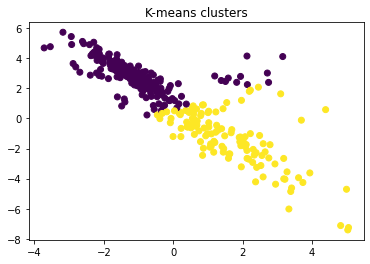

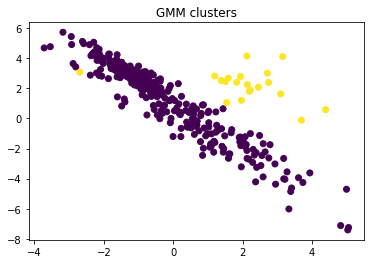

In [41]:
X, y = make_blobs(n_samples=300, centers=2, cluster_std=[1.0, 2.5], random_state=0)
X = np.dot(X, [[0.6, -0.6], [-0.4, 0.8]])
X = np.concatenate((X, np.random.randn(20, 2) + np.array([2.0, 2.0])))

# Perform clustering with K-means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Perform clustering with GMM
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)

# Plot the K-means clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-means clusters")
plt.show()

# Plot the GMM clusters
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X))
plt.title("GMM clusters")
plt.show()

In [37]:
from sklearn.cluster import KMeans

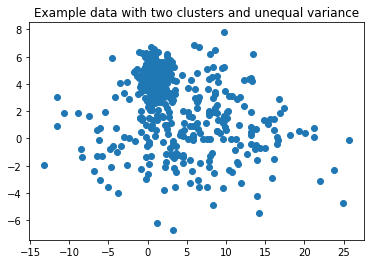

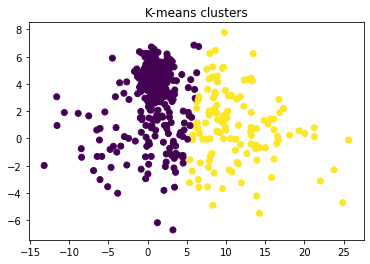

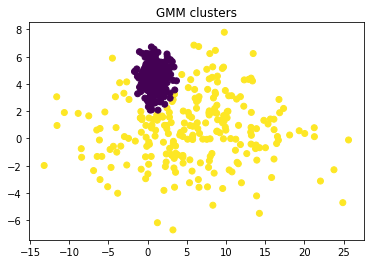

In [39]:
# Generate example data with two clusters and unequal variance
X, y = make_blobs(n_samples=500, centers=2, cluster_std=[1.0, 2.5], random_state=0)

# Increase the variance of the second cluster along one dimension
X[y == 1, 0] *= 3


plt.scatter(X[:, 0], X[:, 1])
plt.title("Example data with two clusters and unequal variance")
plt.show()

# Perform clustering with K-means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Perform clustering with GMM
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)

# Plot the K-means clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-means clusters")
plt.show()

# Plot the GMM clusters
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X))
plt.title("GMM clusters")
plt.show()